Checking the directory and all the files it contains

In [34]:
from wordcloud import WordCloud, STOPWORDS

In [35]:
import os

In [36]:
current_path=os.getcwd()

In [37]:
current_path

'C:\\Users\\ashis\\Desktop\\my_all_notebook\\covid-19_data_visualization'

Let's check all files our current directory contain

In [38]:
all_files=os.listdir(current_path)

In [39]:
all_files

['.ipynb_checkpoints',
 'Covid-19_data_analysis.ipynb',
 'COVID19_line_list_data.csv',
 'COVID19_open_line_list.csv',
 'covid_19_data.csv',
 'data',
 'novel-corona-virus-2019-dataset.zip',
 'time_series_covid_19_confirmed.csv',
 'time_series_covid_19_confirmed_US.csv',
 'time_series_covid_19_deaths.csv',
 'time_series_covid_19_deaths_US.csv',
 'time_series_covid_19_recovered.csv']

we need all the csv files

In [40]:
csv_files=[]
for i in all_files:
    if i.endswith('.csv'):
        csv_files.append(i)

In [41]:
csv_files

['COVID19_line_list_data.csv',
 'COVID19_open_line_list.csv',
 'covid_19_data.csv',
 'time_series_covid_19_confirmed.csv',
 'time_series_covid_19_confirmed_US.csv',
 'time_series_covid_19_deaths.csv',
 'time_series_covid_19_deaths_US.csv',
 'time_series_covid_19_recovered.csv']

now we will create a list of pandas dataframe each containing one csv file.

In [42]:
import pandas as pd

In [43]:
df=[pd.read_csv(i) for i in csv_files]

In [44]:
for i in range(0,len(df)):
    print(df[i].head(2))
    print(str(i)*100)

   id  case_in_country reporting date  Unnamed: 3  \
0   1              NaN      1/20/2020         NaN   
1   2              NaN      1/20/2020         NaN   

                                             summary             location  \
0  First confirmed imported COVID-19 pneumonia pa...  Shenzhen, Guangdong   
1  First confirmed imported COVID-19 pneumonia pa...             Shanghai   

  country  gender   age symptom_onset  ...  recovered symptom  \
0   China    male  66.0      01/03/20  ...          0     NaN   
1   China  female  56.0     1/15/2020  ...          0     NaN   

                                              source  \
0               Shenzhen Municipal Health Commission   
1  Official Weibo of Shanghai Municipal Health Co...   

                                                link  Unnamed: 21  \
0  http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...          NaN   
1  https://www.weibo.com/2372649470/IqogQhgfa?fro...          NaN   

   Unnamed: 22 Unnamed: 23 Unnamed:

In [45]:
len(df)

8

In [46]:
df[0].isnull().sum()

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
source                      0
link                        0
Unnamed: 21              1085
Unnamed: 22              1085
Unnamed: 23              1085
Unnamed: 24              1085
Unnamed: 25              1085
Unnamed: 26              1085
dtype: int64

In [47]:
df[0].shape

(1085, 27)

In [48]:
df[0].drop(['Unnamed: 3','Unnamed: 21','Unnamed: 22',
            'Unnamed: 23','Unnamed: 24','Unnamed: 25',
            'Unnamed: 26','exposure_end','exposure_start',
            'hosp_visit_date','If_onset_approximated','symptom_onset','link','source'],axis=1,inplace=True)

In [49]:
df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1085 non-null   int64  
 1   case_in_country  888 non-null    float64
 2   reporting date   1084 non-null   object 
 3   summary          1080 non-null   object 
 4   location         1085 non-null   object 
 5   country          1085 non-null   object 
 6   gender           902 non-null    object 
 7   age              843 non-null    float64
 8   visiting Wuhan   1085 non-null   int64  
 9   from Wuhan       1081 non-null   float64
 10  death            1085 non-null   object 
 11  recovered        1085 non-null   object 
 12  symptom          270 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 110.3+ KB


In [50]:
df[0].death.unique()

array(['0', '1', '2/14/2020', '2/26/2020', '2/13/2020', '2/28/2020',
       '2/27/2020', '2/25/2020', '2/23/2020', '2/24/2020', '2/22/2020',
       '02/01/20', '2/19/2020', '2/21/2020'], dtype=object)

In [51]:
df[0].recovered.unique()

array(['0', '1', '02/12/20', '1/15/2020', '12/30/1899', '02/08/20',
       '2/14/2020', '02/04/20', '2/18/2020', '02/05/20', '2/17/2020',
       '02/09/20', '2/15/2020', '2/27/2020', '2/19/2020', '2/20/2020',
       '1/17/2020', '02/07/20', '2/21/2020', '2/23/2020', '02/11/20',
       '2/22/2020', '2/16/2020', '2/24/2020', '2/26/2020', '2/25/2020',
       '02/06/20', '2/28/2020', '1/30/2020', '2/13/2020', '02/02/20',
       '1/31/2020'], dtype=object)

In [52]:
df[0].describe()

,id,case_in_country,age,visiting Wuhan,from Wuhan
count,1085.000000,888.000000,843.000000,1085.000000,1081.000000
mean,543.000000,48.841216,49.483689,0.176959,0.144311
std,313.356825,78.853528,18.255334,0.381810,0.351567
min,1.000000,1.000000,0.250000,0.000000,0.000000
25%,272.000000,11.000000,35.000000,0.000000,0.000000
50%,543.000000,28.000000,51.000000,0.000000,0.000000
75%,814.000000,67.250000,64.000000,0.000000,0.000000
max,1085.000000,1443.000000,96.000000,1.000000,1.000000


In [53]:
df[0].shape

(1085, 13)

In [54]:
df[0].tail(10)

,id,case_in_country,reporting date,summary,location,country,gender,age,visiting Wuhan,from Wuhan,death,recovered,symptom
1075,1076,14.0,2/25/2020,new COVID-19 patient confirmed in Bahrain: mal...,Bahrain,Bahrain,male,NaN,0,0.0,0,0,NaN
1076,1077,15.0,2/25/2020,new COVID-19 patient confirmed in Bahrain: mal...,Bahrain,Bahrain,male,NaN,0,0.0,0,0,NaN
1077,1078,16.0,2/25/2020,new COVID-19 patient confirmed in Bahrain: fem...,Bahrain,Bahrain,female,NaN,0,0.0,0,0,NaN
1078,1079,17.0,2/25/2020,new COVID-19 patient confirmed in Bahrain: fem...,Bahrain,Bahrain,female,NaN,0,0.0,0,0,NaN
1079,1080,1.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,0,0.0,0,0,NaN
1080,1081,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,0,0.0,0,0,NaN
1081,1082,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,0,0.0,0,0,NaN
1082,1083,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,0,0.0,0,0,NaN
1083,1084,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,0,0.0,0,0,NaN
1084,1085,1.0,2/25/2020,new COVID-19 patient confirmed in Switzerland:...,Bern,Switzerland,male,70.0,0,0.0,0,0,NaN


In [55]:
df[0].set_index('id',inplace=True)

## Let's see country wise data distribution

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [57]:
df[0].country.value_counts()

China          197
Japan          190
South Korea    114
Hong Kong       94
Singapore       93
Germany         54
Thailand        41
France          39
Spain           34
Taiwan          34
Malaysia        23
UAE             21
UK              20
USA             18
Iran            18
Bahrain         17
Vietnam         16
Australia       15
Canada          12
Kuwait           9
Phillipines      3
Italy            3
India            3
Austria          2
Russia           2
Nepal            1
Lebanon          1
Sweden           1
Croatia          1
Switzerland      1
Finland          1
Sri Lanka        1
Afghanistan      1
Algeria          1
Egypt            1
Israel           1
Cambodia         1
Belgium          1
Name: country, dtype: int64

In [58]:
country_cnt=df[0].country.value_counts().sort_values(ascending=False)

In [59]:
country_cnt.index

Index(['China', 'Japan', 'South Korea', 'Hong Kong', 'Singapore', 'Germany',
       'Thailand', 'France', 'Taiwan', 'Spain', 'Malaysia', 'UAE', 'UK', 'USA',
       'Iran', 'Bahrain', 'Vietnam', 'Australia', 'Canada', 'Kuwait',
       'Phillipines', 'Italy', 'India', 'Austria', 'Russia', 'Cambodia',
       'Sri Lanka', 'Israel', 'Egypt', 'Algeria', 'Afghanistan', 'Sweden',
       'Finland', 'Switzerland', 'Croatia', 'Lebanon', 'Nepal', 'Belgium'],
      dtype='object')

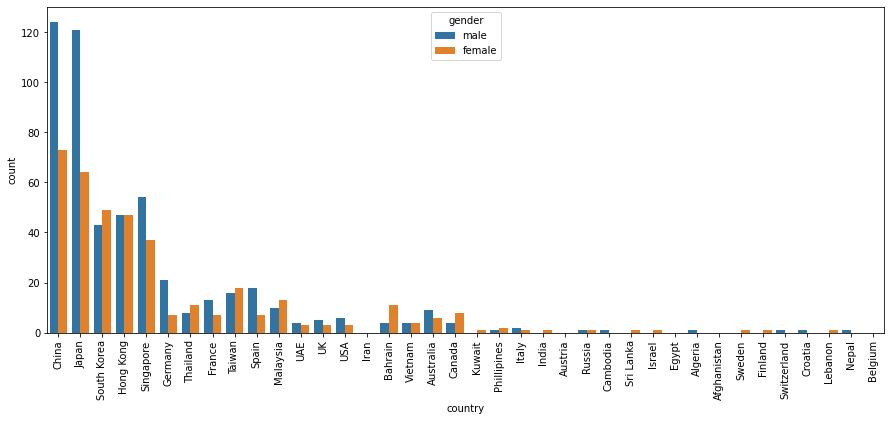

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(x='country',data=df[0],hue='gender',order=country_cnt.index)
plt.xticks(rotation=90)
plt.show()

## country wise affected

In [61]:
data=df[0].groupby('country').sum()['case_in_country']

In [62]:
data=data.sort_values()

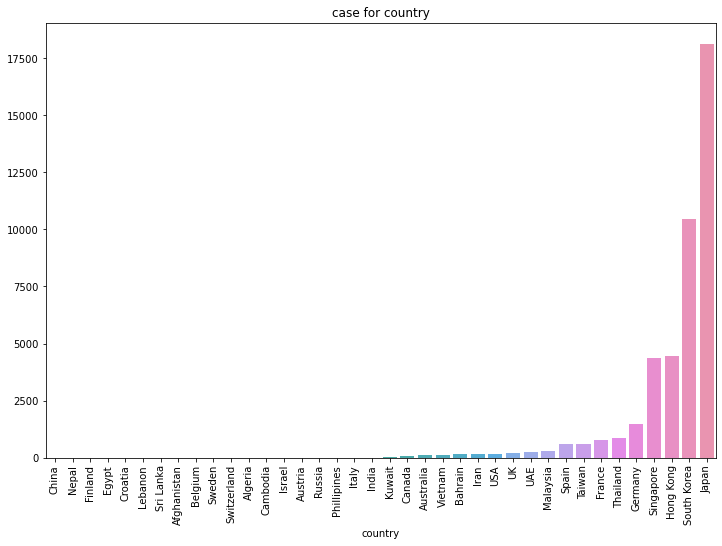

In [63]:
plt.figure(figsize=(12,8))
sns.barplot(x=data.index,y=data.values)
plt.xticks(rotation=90)
plt.title('case for country')
plt.show()

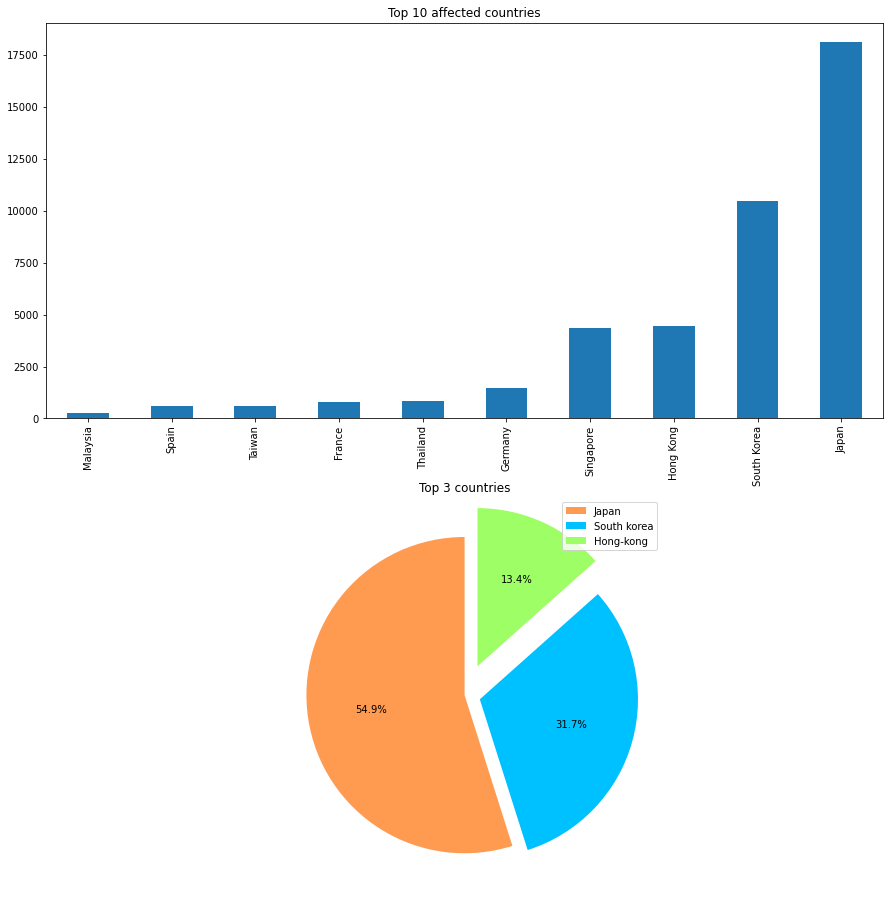

In [64]:
plt.figure(figsize=(15,16))
plt.subplot(2,1,1)
data.sort_values(ascending=True).tail(10).plot(kind='bar')
plt.title('Top 10 affected countries')
plt.xlabel('')
plt.subplot(2,1,2)
data.sort_values(ascending=False).head(3).plot(kind='pie',autopct='%1.1f%%',explode=[0,0.1,0.2],colors=['#FF9B51','#00C1FF','#9DFE66'],startangle=90,labels=None)
plt.title('Top 3 countries')
plt.legend(labels=['Japan','South korea','Hong-kong'])
plt.ylabel('')
plt.show()

## Analyse the summary columns using wordcloud

In [65]:
df[0]['summary'].astype('str')

id
1       First confirmed imported COVID-19 pneumonia pa...
2       First confirmed imported COVID-19 pneumonia pa...
3       First confirmed imported cases in Zhejiang: pa...
4       new confirmed imported COVID-19 pneumonia in T...
5       new confirmed imported COVID-19 pneumonia in T...
                              ...                        
1081    new COVID-19 patient confirmed in Austria: 24,...
1082    new COVID-19 patient confirmed in Afghanistan:...
1083    new COVID-19 patient confirmed in Algeria: mal...
1084    new COVID-19 patient confirmed in Croatia: mal...
1085    new COVID-19 patient confirmed in Switzerland:...
Name: summary, Length: 1085, dtype: object

In [68]:
string=''
for value in df[0].summary.astype('str'):
    #print(value.split(' '))
    #print(value.split(' '))
    #print(type(value))
    for word in value.split(' '):
        string=string+' '+str(word)

In [69]:
len(string)

148928

In [70]:
stopwords = set(STOPWORDS)

#initiate a wordclout object
wc=WordCloud(background_color='white')

In [71]:
wc.generate(string)

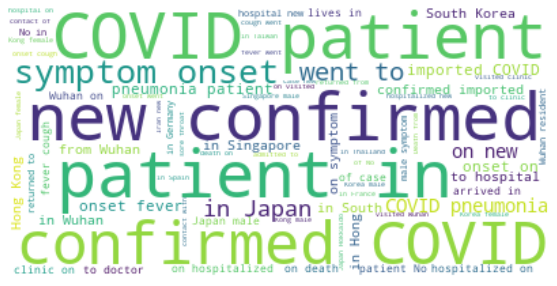

In [72]:
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 2nd dataset

In [73]:
df[1].shape

(14126, 45)

In [74]:
df[1].head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df[1].set_index('ID',inplace=True)

In [76]:
df[1].info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 14126 entries, 1.0 to nan
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1349 non-null   object 
 1   sex                       1264 non-null   object 
 2   city                      10194 non-null  object 
 3   province                  12906 non-null  object 
 4   country                   13148 non-null  object 
 5   wuhan(0)_not_wuhan(1)     13170 non-null  float64
 6   latitude                  13147 non-null  float64
 7   longitude                 13147 non-null  float64
 8   geo_resolution            13147 non-null  object 
 9   date_onset_symptoms       746 non-null    object 
 10  date_admission_hospital   730 non-null    object 
 11  date_confirmation         13089 non-null  object 
 12  symptoms                  493 non-null    object 
 13  lives_in_Wuhan            565 non-null    object 
 14  trav

In [77]:
df[1]=df[1].iloc[:,:33]

In [78]:
df[1].head()

,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,Unnamed: 33
ID,,,,,,,,,,,,,,,,,,,,,
1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,...,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN,NaN
2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,...,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN,NaN
3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,...,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN
4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,...,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN
5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,...,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN,NaN


In [79]:
df[1].isnull().sum()

age                         12777
sex                         12862
city                         3932
province                     1220
country                       978
wuhan(0)_not_wuhan(1)         956
latitude                      979
longitude                     979
geo_resolution                979
date_onset_symptoms         13380
date_admission_hospital     13396
date_confirmation            1037
symptoms                    13633
lives_in_Wuhan              13561
travel_history_dates        13623
travel_history_location     13368
reported_market_exposure    14091
additional_information      11714
chronic_disease_binary      14108
chronic_disease             14113
source                       1176
sequence_available          14125
outcome                     13942
date_death_or_discharge     14033
notes_for_discussion        13939
location                    13102
admin3                      12967
admin2                       5058
admin1                       1249
country_new   

it looks like this data set has too much missing values. So lets look at the other data set

In [80]:
df[2].shape

(27618, 8)

In [81]:
df[2].head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [82]:
df[2].set_index('SNo',inplace=True)

In [83]:
data=df[2].groupby('ObservationDate').sum()

In [84]:
data.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
01/22/2020,555.0,17.0,28.0
01/23/2020,653.0,18.0,30.0
01/24/2020,941.0,26.0,36.0
01/25/2020,1438.0,42.0,39.0
01/26/2020,2118.0,56.0,52.0


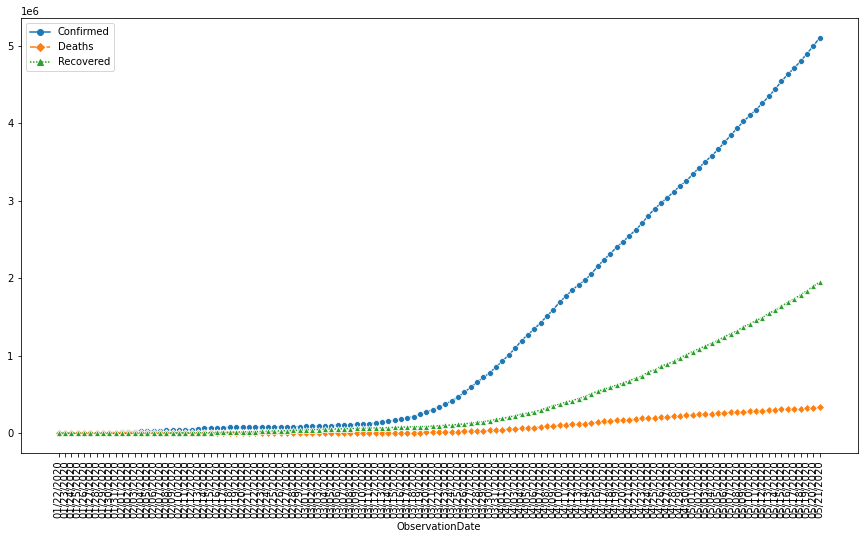

In [85]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data,markers=['o','D','^'])
plt.xticks(rotation=90)
plt.show()

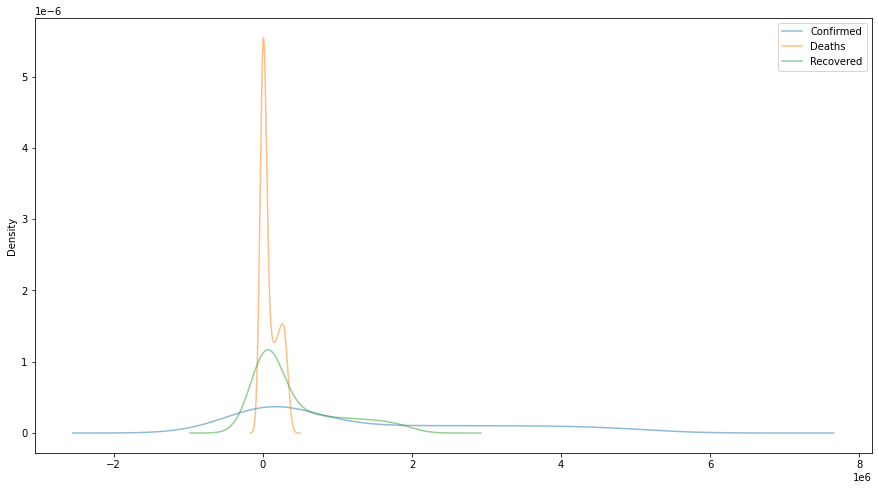

In [86]:
data.plot(kind='density',stacked=False,alpha=0.5,figsize=(15,8))

In [87]:
data.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
01/22/2020,555.0,17.0,28.0
01/23/2020,653.0,18.0,30.0
01/24/2020,941.0,26.0,36.0
01/25/2020,1438.0,42.0,39.0
01/26/2020,2118.0,56.0,52.0


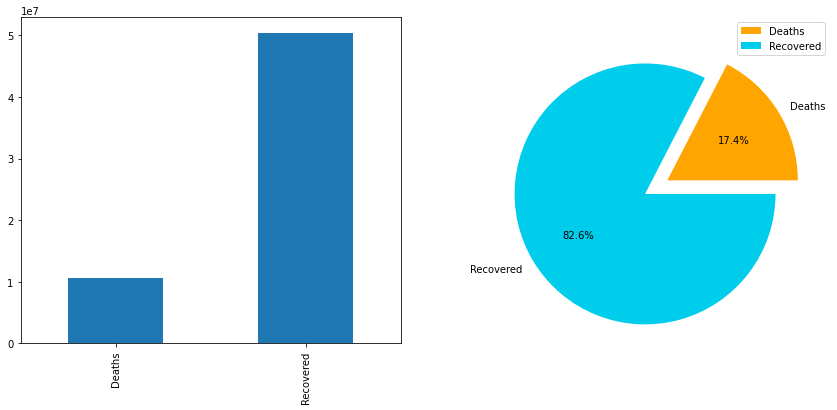

In [88]:
temp=data.iloc[:,[1,2]].sum()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
temp.plot(kind='bar')
plt.subplot(1,2,2)
temp.plot(kind='pie',autopct='%1.1f%%',explode=[0,0.2],colors=['orange','#00CCEB'],startangle=0)
plt.legend(labels=['Deaths','Recovered'])
plt.ylabel("")
plt.show()

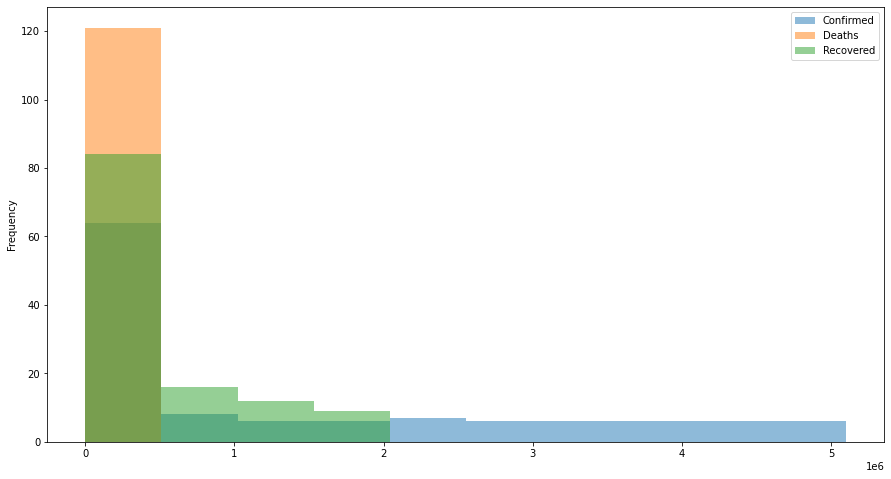

In [89]:
data.plot(kind='hist',stacked=False,alpha=0.5,figsize=(15,8))

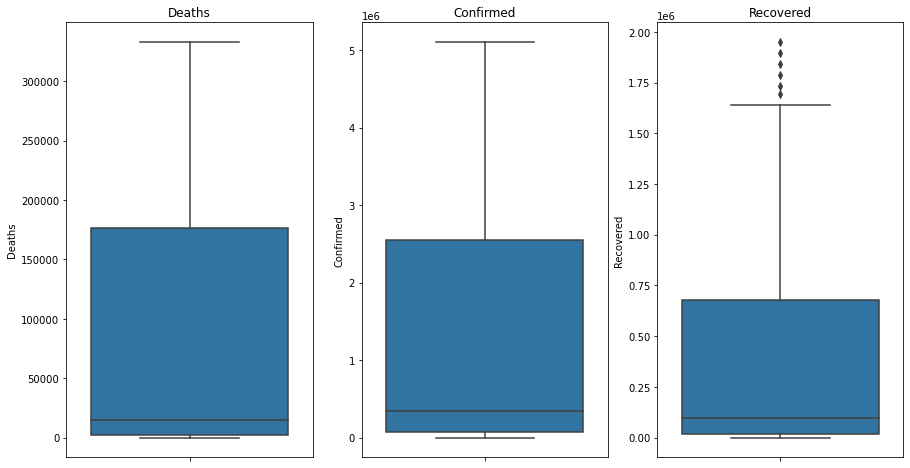

In [90]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.boxplot(y=data.Deaths)
plt.title('Deaths')
plt.subplot(1,3,2)
sns.boxplot(y=data.Confirmed)
plt.title('Confirmed')
plt.subplot(1,3,3)
sns.boxplot(y=data.Recovered)
plt.title('Recovered')
plt.show()

In [91]:
df[3].shape

(266, 125)

In [92]:
df[3].head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,876,880,898,916,933,946,948,949,964,969
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,758,760,761,761,761,761,761,761,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,45,45,48,48,48,48,50,52,52,58


In [93]:
location_wise_spread=pd.DataFrame()

In [94]:
location_wise_spread[['country','lat','long']]=df[3][['Country/Region','Lat','Long']]

In [95]:
location_wise_spread['total']=df[3].iloc[:,4:].sum(axis=1).values

In [96]:
location_wise_spread.head()

,country,lat,long,total
0,Afghanistan,33.0000,65.0000,132436
1,Albania,41.1533,20.1683,36252
2,Algeria,28.0339,1.6596,198533
3,Andorra,42.5063,1.5218,37761
4,Angola,-11.2027,17.8739,1562


show affected region in map

In [97]:
import folium

In [98]:
spread_map=folium.Map(location=[28.0339,1.6596],zoom_start=2)

In [99]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(location_wise_spread.lat,location_wise_spread.long):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
spread_map.add_child(incidents)

In [100]:
df[4].head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,152,152,152,154,154,154,154,154,154,165
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,19,19,19,19,21,21,21,21,21,22
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,2299,2329,2427,2542,2589,2646,2710,2805,2866,2913
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,69,69,69,69,69,69,69,69,69,69


# Lets explore different data set

In [101]:
os.getcwd()

'C:\\Users\\ashis\\Desktop\\my_all_notebook\\covid-19_data_visualization'

In [102]:
os.chdir('C:\\Users\\ashis\\Desktop\\my_all_notebook\\covid-19_data_visualization\\')

In [103]:
os.listdir(os.getcwd()+'\\'+'data')

['.ipynb_checkpoints',
 'datasets_582631_1175383_UNCOVER_our_world_in_data_coronavirus-disease-covid-19-statistics-and-research.csv',
 'datasets_582631_1175383_UNCOVER_our_world_in_data_covid-19-testing-all-observations.csv',
 'datasets_582631_1175383_UNCOVER_our_world_in_data_covid-19-testing-latest-data-and-source-details.csv',
 'datasets_582631_1175383_UNCOVER_WHO_world-health-organization-who-situation-reports.csv']

In [104]:
data1=pd.read_csv('data/datasets_582631_1175383_UNCOVER_our_world_in_data_coronavirus-disease-covid-19-statistics-and-research.csv')

In [105]:
data1.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [106]:
data1.shape

(14090, 16)

In [107]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14090 entries, 0 to 14089
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  13905 non-null  object 
 1   location                  14090 non-null  object 
 2   date                      14090 non-null  object 
 3   total_cases               14090 non-null  int64  
 4   new_cases                 14090 non-null  int64  
 5   total_deaths              14090 non-null  int64  
 6   new_deaths                14090 non-null  int64  
 7   total_cases_per_million   13804 non-null  float64
 8   new_cases_per_million     13804 non-null  float64
 9   total_deaths_per_million  13804 non-null  float64
 10  new_deaths_per_million    13804 non-null  float64
 11  total_tests               3448 non-null   float64
 12  new_tests                 3071 non-null   float64
 13  total_tests_per_thousand  3448 non-null   float64
 14  new_te

In [108]:
data1['date']=pd.to_datetime(data1['date'])

In [109]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14090 entries, 0 to 14089
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iso_code                  13905 non-null  object        
 1   location                  14090 non-null  object        
 2   date                      14090 non-null  datetime64[ns]
 3   total_cases               14090 non-null  int64         
 4   new_cases                 14090 non-null  int64         
 5   total_deaths              14090 non-null  int64         
 6   new_deaths                14090 non-null  int64         
 7   total_cases_per_million   13804 non-null  float64       
 8   new_cases_per_million     13804 non-null  float64       
 9   total_deaths_per_million  13804 non-null  float64       
 10  new_deaths_per_million    13804 non-null  float64       
 11  total_tests               3448 non-null   float64       
 12  new_tests         

In [110]:
data1.isna().sum()

iso_code                      185
location                        0
date                            0
total_cases                     0
new_cases                       0
total_deaths                    0
new_deaths                      0
total_cases_per_million       286
new_cases_per_million         286
total_deaths_per_million      286
new_deaths_per_million        286
total_tests                 10642
new_tests                   11019
total_tests_per_thousand    10642
new_tests_per_thousand      11014
tests_units                 10642
dtype: int64

In [111]:
data1=data1.drop(['total_tests','new_tests','total_tests_per_thousand','new_tests_per_thousand','tests_units'],axis=1).dropna()

In [112]:
data1.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0


<Figure size 1080x576 with 0 Axes>

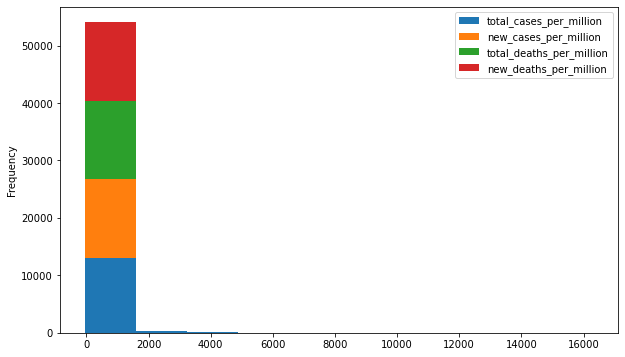

In [113]:
plt.figure(figsize=(15,8))
data1[['total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million']].plot(kind='hist',stacked=True,figsize=(10,6))
plt.show()

In [114]:
datewise=data1[['date','total_cases_per_million','new_cases_per_million','total_deaths_per_million','new_deaths_per_million']].groupby('date').sum()

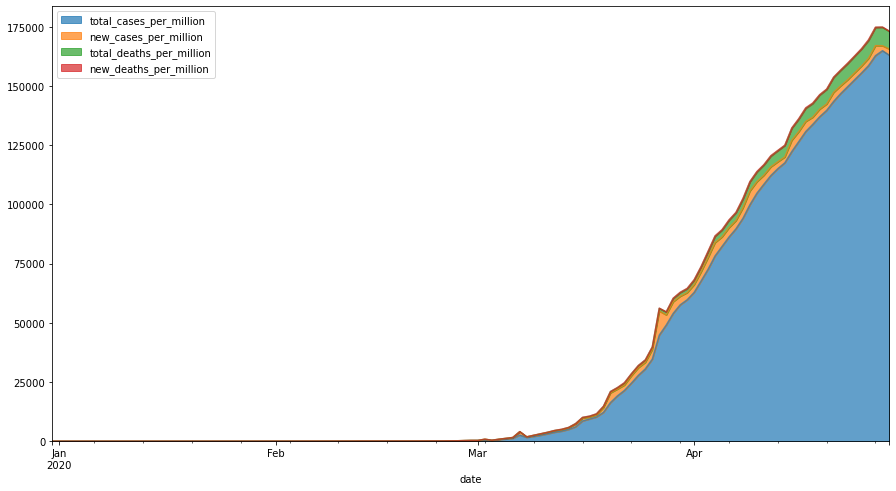

In [115]:
datewise.plot(kind='area',figsize=(15,8),stacked=True,alpha=0.7)
plt.show()

In [116]:
data2=pd.read_csv('data/datasets_582631_1175383_UNCOVER_our_world_in_data_covid-19-testing-all-observations.csv')

In [117]:
data2.head()

,entity,date,source_url,source_label,notes,cumulative_total,daily_change_in_cumulative_total,cumulative_total_per_thousand,daily_change_in_cumulative_total_per_thousand,3_day_rolling_mean_daily_change,3_day_rolling_mean_daily_change_per_thousand
0,Argentina - tests performed,2020-04-08,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,13330,NaN,0.295,NaN,NaN,NaN
1,Argentina - tests performed,2020-04-09,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,14850,1520.0,0.329,0.034,NaN,NaN
2,Argentina - tests performed,2020-04-10,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,16379,1529.0,0.362,0.034,NaN,NaN
3,Argentina - tests performed,2020-04-11,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,18027,1648.0,0.399,0.036,1565.667,0.035
4,Argentina - tests performed,2020-04-13,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,19758,NaN,0.437,NaN,NaN,NaN


In [118]:
data2['date']=pd.to_datetime(data2['date'])

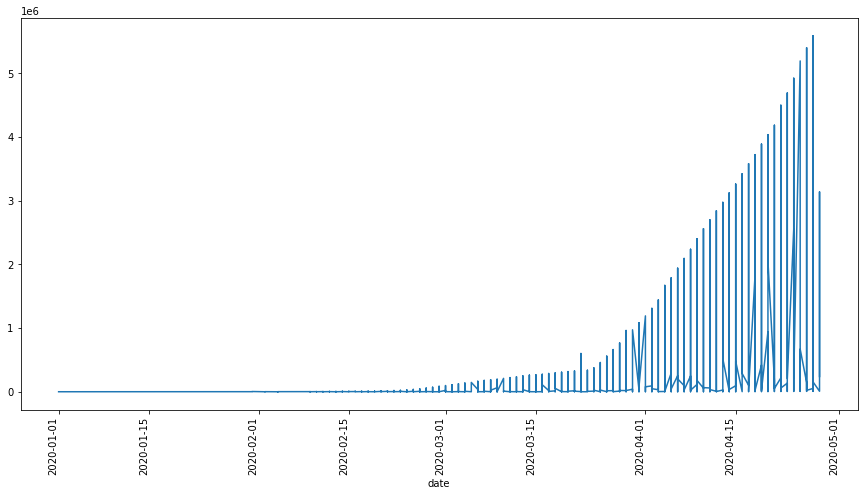

In [119]:
data2.set_index('date')['cumulative_total'].dropna().plot(kind='line',figsize=(15,8))
plt.xticks(rotation=90)
plt.title('')
plt.show()

In [120]:
data3=pd.read_csv('data/datasets_582631_1175383_UNCOVER_our_world_in_data_covid-19-testing-latest-data-and-source-details.csv')

In [121]:
data3.head()

,entity,date,source_url,source_label,notes,number_of_observations,cumulative_total,cumulative_total_per_thousand,daily_change_in_cumulative_total,daily_change_in_cumulative_total_per_thousand,3_day_rolling_mean_daily_change,3_day_rolling_mean_daily_change_per_thousand,general_source_label,general_source_url,short_description,detailed_description
0,Argentina - tests performed,2020-04-28,https://www.argentina.gob.ar/sites/default/fil...,Government of Argentina,NaN,20,53600,1.186,1700.0,0.038,2064.667,0.046,Government of Argentina,https://www.argentina.gob.ar/coronavirus/infor...,The number of tests performed.,Two reports are published daily by the governm...
1,Australia - units unclear,2020-04-27,https://github.com/pappubahry/AU_COVID19,Federal Department of Health,Made available on GitHub by pappubahry,84,516705,20.263,10256.0,0.402,11445.000,0.449,Australian Department for Health; State-level ...,https://www1.health.gov.au/internet/main/publi...,The source reports this data as the 'number of...,The Australian Department for Health publish d...
2,Austria - units unclear,2020-04-28,https://www.sozialministerium.at/Informationen...,Austrian Ministry for Health,NaN,62,239578,26.601,7041.0,0.782,6163.000,0.684,Austria Ministry for Health,https://www.sozialministerium.at/Informationen...,The source reports this data as the 'number of...,The Austrian Ministry for Health publishes dai...
3,Bahrain - units unclear,2020-04-28,https://www.moh.gov.bh/COVID19,Ministry of Health,NaN,39,121706,71.525,3909.0,2.297,3766.333,2.213,Bahrain Ministry of Health,https://www.moh.gov.bh/COVID19,The source reports the 'number of assessments'...,The Bahrainian Ministry of Health publishes fr...
4,Bangladesh - samples tested,2020-04-28,https://covid19.cramstack.com/,Government of Bangladesh,NaN,55,54733,0.332,4436.0,0.027,3907.000,0.024,Government of Bangladesh,https://corona.gov.bd/,The number of samples tested.,The Government of Bangladesh provides data on ...


In [122]:
data4=pd.read_csv('data/datasets_582631_1175383_UNCOVER_WHO_world-health-organization-who-situation-reports.csv')

In [123]:
data4.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
